In [1]:
import time
import sympy as sp
import numpy as np
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [2]:
url='https://www.janestreet.com/puzzles/single-cross-2-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[10:23]))))

### Puzzle as published 
https://www.janestreet.com/puzzles/single-cross-2-index/

### Single-Cross 2

Show Solution
Consider 3-space (i.e.
R
3
) partitioned into a grid of unit
cubes with faces defined by the planes of all points with at least one
integer coordinate. For a fixed positive real number
D
, a random
line segment of length
D
(chosen uniformly in location and
orientation) is placed in this cubic lattice.
What length
D
maximizes the probability that the endpoints of the
segment lie in orthogonally adjacent unit cubes (that is, the segment
crosses exactly one integer-coordinate plane), and what is this
maximal probability? Give your answer as a
comma-separated pair of
values to 10 significant places

Probability is : $\frac{2 D \left(2 - D\right)}{\pi}$

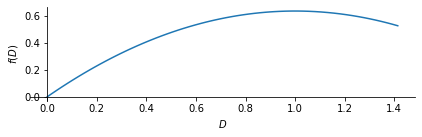

In [3]:
# Think about the 2D case. Have the solution from the previous puzzle
# In the first quadrant of a circle the line covers a distance of cos(theta) along the x-axis and sin(theta) 
# along the y-axis, and so has a probability of 1−cos(theta)
# of not hitting a vertical line, a probability of sin(theta) of hitting the horizontal line
# want to average this across all theta so integrate in polar coords 0 - pi/2 and divide by pi/2

D,theta,phi = sp.symbols("D theta phi")

x = D*sp.sin(theta)
y = D*sp.cos(theta)

# to get the probability multiply by 2 to get the probability of either hitting the x or y axis
# divide by the interval to get the average.
# Jacobian determinant is r but we are not integrating over that so ignore

prob = 2/(sp.pi/2)*sp.integrate((1-x)*y,(theta,0,sp.pi/2)).simplify()
display(Markdown("Probability is : $"+sp.latex(prob)+"$"))
print("\n")
plot(prob,(D,0,2**.5),size=(6,2))
print("")

In [4]:
#differentiate to get the max and then substitute
Eq1 = sp.diff(prob).simplify()
soln =sp.solve(sp.Eq(Eq1,0))[0]
display(Markdown("Optimal length when D = $"+sp.latex(soln)+"$\n"))
print("\n")
display(Markdown("With a probability of $"+sp.latex(prob.subs(D,soln))+"$"))


Optimal length when D = $1$


With a probability of $\frac{2}{\pi}$

Probability is : $\frac{D \left(3 D^{2} - 16 D + 6 \pi\right)}{4 \pi}$

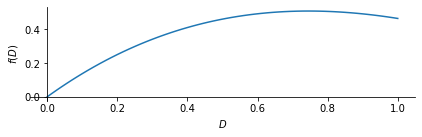

In [5]:
# extend to 3D
x = D*sp.sin(theta)*sp.cos(phi)
y = D*sp.sin(theta)*sp.sin(phi)
z = D*sp.cos(theta)
Jacobian = sp.sin(theta) #again ignore r**2

prob = 3/(sp.pi/2)*sp.integrate((1-x)*(1-y)*z*Jacobian,(theta,0,sp.pi/2),(phi,0,sp.pi/2)).simplify()
display(Markdown("Probability is : $"+ sp.latex(prob)+"$"))
print("\n")
plot(prob,(D,0,1),size=(6,2))
print("")

In [6]:
Eq1 = sp.diff(prob).simplify()
soln =sp.solve(sp.Eq(Eq1,0))[0]
display(Markdown("Optimal length when D = $"+sp.latex(soln)+"$"))
print("\n")
display(Markdown("With a probability = $"+sp.latex(prob.subs(D,soln))+"$"))
print("")

Optimal length when D = $\frac{16}{9} - \frac{\sqrt{256 - 54 \pi}}{9}$

With a probability = $\frac{\left(\frac{16}{9} - \frac{\sqrt{256 - 54 \pi}}{9}\right) \left(- \frac{256}{9} + 3 \left(\frac{16}{9} - \frac{\sqrt{256 - 54 \pi}}{9}\right)^{2} + \frac{16 \sqrt{256 - 54 \pi}}{9} + 6 \pi\right)}{4 \pi}$

In [7]:
display(Markdown("Solution is : **{:.10f} , {:.10f}**".format(soln,prob.subs(D,soln).evalf())))

Solution is : **0.7452572091 , 0.5095346021**

In [8]:
url='https://www.janestreet.com/puzzles/single-cross-2-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published \n'+url))
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[10:20]))))

### Solution as published 
https://www.janestreet.com/puzzles/single-cross-2-solution/

### Single-Cross 2

Show Puzzle
August’s puzzle was a three dimensional throwback to
Single Cross
from three years ago. Careful computation determined that for lengths D <= 1, the probability of a single cross comes to the pleasantly symmetric spherical coordinate double integral. (As seen above.)
This double integral miraculously simplifies to (1/(4π))*D(-16D + 3D^2 + 6π). This function has a local maximum at D = (16 - sqrt(256 - 54π))/9 ~
0.7452572091
, with value ~
0.5095346021
. The argument that there can’t be a second higher local maximum with D > 1 is left to the puzzler.
Congrats to this month’s solvers who successfully completed the optimal length and probability!

In [9]:
#compute jacobian
r, theta, phi = sp.symbols('r theta phi')

# Define the transformation equations
x = r * sp.sin(theta) * sp.cos(phi)
y = r * sp.sin(theta) * sp.sin(phi)
z = r * sp.cos(theta)

# Create the Jacobian matrix
J = sp.Matrix([
    [x.diff(r), x.diff(theta), x.diff(phi)],
    [y.diff(r), y.diff(theta), y.diff(phi)],
    [z.diff(r), z.diff(theta), z.diff(phi)]
])

# Compute the determinant of the Jacobian matrix
J_det = J.det()

J_det.simplify()


r**2*sin(theta)